In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read the csv file into pandas
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    return df

In [3]:
df = pd.read_csv("census01 DataSet.csv")
df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Allen Circle,John,Grant,43,Head,Married,Male,Operational investment banker,None,None
1,1,Allen Circle,Kim,Grant,37,Wife,Married,Female,Intelligence analyst,None,None
2,2,Allen Circle,Sally,Atkinson,44,Head,Single,Female,"Production designer, theatre/television/film",None,Christian
3,2,Allen Circle,Karl,Robertson,44,Partner,Single,Male,Paediatric nurse,None,Christian
4,2,Allen Circle,Tracy,Atkinson,24,Daughter,Single,Female,Child psychotherapist,None,Christian


In [4]:
df.sample(15)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2546,7,Smith Squares,Mathew,Thomas-Warren,23,Son,Single,Male,Unemployed,None,None
1427,141,Mace Green,Olivia,Peacock,8,Daughter,NaN,Female,Student,None,NaN
732,147,Aberdeen Avenue,Kieran,Bowen,22,Son,Single,Male,University Student,None,Methodist
1109,51,Mace Green,Deborah,Matthews,59,Lodger,Single,Female,Pharmacologist,None,Christian
6992,10,Summers Meadows,Mathew,Jones,57,Head,Divorced,Male,"Pharmacist, community",None,None
1599,192,Mace Green,Denise,Simpson-Morris,34,Daughter,Single,Female,Higher education careers adviser,None,None
1742,29,Whittaker Crescent,Simon,Johnson,21,Head,Single,Male,University Student,None,None
8351,8,Connolly Park,Joanna,Smith,62,Lodger,Divorced,Female,Aid worker,None,Methodist
5841,74,Dennis Viaduct,Caroline,Hughes,25,Daughter,Single,Female,Printmaker,None,None
7098,47,Summers Meadows,Steven,Hill,16,Son,NaN,Male,Student,None,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9405 entries, 0 to 9404
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9405 non-null   int64 
 1   Street                         9405 non-null   object
 2   First Name                     9405 non-null   object
 3   Surname                        9405 non-null   object
 4   Age                            9405 non-null   object
 5   Relationship to Head of House  9405 non-null   object
 6   Marital Status                 7171 non-null   object
 7   Gender                         9405 non-null   object
 8   Occupation                     9405 non-null   object
 9   Infirmity                      9405 non-null   object
 10  Religion                       7131 non-null   object
dtypes: int64(1), object(10)
memory usage: 808.4+ KB


### Data assessment

In [6]:
df.duplicated().sum()

1

In [7]:
df[df.duplicated()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5526,39,Godfrey Lane,Emma,Jackson,14,Daughter,NaN,Female,Student,None,NaN


In [8]:
df.iloc[5525:5527, :]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5525,39,Godfrey Lane,Emma,Jackson,14,Daughter,NaN,Female,Student,None,NaN
5526,39,Godfrey Lane,Emma,Jackson,14,Daughter,NaN,Female,Student,None,NaN


In [9]:
#drop duplicate
df = df.drop_duplicates()

### Data cleaning

##### Marital Status column

In [10]:
df['Marital Status'].value_counts()

Single      3209
Married     2727
Divorced     875
Widowed      359
               1
Name: Marital Status, dtype: int64

- The marital status column has four distinct values with one blank value while others are NaN values. 
- The row with the marital status as a blank value is row 603. The row shows that the subject is a husband but the marital status is evaded. Given the other details provided by other columns, the blank value will be replaced with "Married".
- The NaN values present in the marital status are for minors; those under 18.

In [11]:
#replace the blank value with "Married"
df['Marital Status'].replace(" ", "Married", inplace=True)

In [12]:
#replace the NaN values with "Minor"
df['Marital Status'].replace(np.nan, "Minor", inplace=True)

In [13]:
df['Marital Status'].value_counts()

Single      3209
Married     2728
Minor       2233
Divorced     875
Widowed      359
Name: Marital Status, dtype: int64

##### Religion column

In [14]:
df['Religion'].value_counts()

None         3118
Christian    2101
Catholic     1022
Methodist     638
Muslim        147
Sikh           53
Jewish         39
Nope            2
Undecided       2
Buddist         2
Pagan           2
Quaker          2
Sith            2
Jedi            1
Name: Religion, dtype: int64

- The distinct values of Religion are shown above.
- It shows that a major part of the population has "None" as their religion.
- The NaN values are attributed to minors. This shows that there is no religion transfer from parents to children.

###### Age column

In [15]:
df['Age'].describe()

count     9404
unique     118
top         41
freq       196
Name: Age, dtype: object

- The age data type is inputed as an object
- The house number data type is inputed as integer

In [16]:
df.iloc[656]

House Number                                 125
Street                           Aberdeen Avenue
First Name                                  Mary
Surname                                   Miller
Age                                             
Relationship to Head of House           Daughter
Marital Status                             Minor
Gender                                    Female
Occupation                                 Child
Infirmity                                   None
Religion                                     NaN
Name: 656, dtype: object

- The only row that is making it impossible for the column to be converted to int is row 656.
- The age of the girl was not inputed. This can either be regarded as NaN or be replaced with a suitable value given the details from other columns. Since the subject's occupation is "child", the age of the subject will be less than 5. 

In [17]:
#replacing the blank value with 1
df['Age'].replace(" ", 1, inplace=True)

In [18]:
df['Age'].value_counts()

41                    196
42                    177
40                    172
44                    172
37                    164
                     ... 
51.589355621448114      1
101                     1
103                     1
105                     1
2.0                     1
Name: Age, Length: 118, dtype: int64

In [19]:
df['Age'].unique()

array(['43', '37', '44', '24', '13', '50', '14', '10', '29', '0', '56',
       '46', '11', '42', '4', '1', '57', '58', '12', '59', '65', '20',
       '45', '39', '34', '31', '28', '21', '9', '7', '51', '22', '2',
       '61', '32', '17', '72', '40', '16', '3', '23', '76', '35', '52',
       '53', '26', '47', '15', '33', '55', '38', '41', '8', '18', '19',
       '36', '69', '60', '5', '84', '63', '88', '71', '49', '74', '25',
       '48', '67', '66', '70', '83', '80', '54', '98', '64', '6', '86',
       '27', '30', '62', '73', '79', '81', '78', '68', 1, '75', '82',
       '89', '87', '91', '85', '77', '99', '102', '92', '104', '100',
       '90', '95', '96', '97', '105', '103', '101', '94', '93',
       '51.589355621448114', '53.589355621448114', '7.0', '3.0', '1.0',
       '107', '61.14390708730485', '10.0', '9.0', '6.0', '2.0'],
      dtype=object)

- The values "51.589355621448114", "53.589...", "61.143..."
- The floats 7.0, 3.0, 1.0, 10.0, 9.0, 6.0, 2.0
- These are values that will be cleaned and replaced appropriately.

- Replacing the value 2.0 with 2 and the 51.5893... with the value before the decimal point

In [20]:
df.loc[df['Age'] == "51.589355621448114"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7300,69,Allen Manor,Beth,Wright,51.589355621448114,Head,Married,Female,Unemployed,None,Methodist


In [21]:
df.loc[df['Age'] == "2.0"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8455,24,Connolly Park,Alexander,Jones,2.0,Son,Minor,Male,Child,None,NaN


In [22]:
df['Age'].replace("51.589355621448114", 51, inplace=True)
df['Age'].replace("2.0", 2, inplace=True)

In [23]:
df.loc[df['Age'] == "3.0"]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7303,69,Allen Manor,Jack,Wright,3.0,Son,Minor,Male,Child,None,NaN


In [24]:
# replacing these floats with the value before the decimal point
df['Age'].replace("53.589355621448114", 53, inplace=True)
df['Age'].replace("61.14390708730485", 61, inplace=True)
df['Age'].replace("7.0", 7, inplace=True)
df['Age'].replace("3.0", 3, inplace=True)
df['Age'].replace("1.0", 1, inplace=True)
df['Age'].replace("10.0", 10, inplace=True)
df['Age'].replace("9.0", 9, inplace=True)
df['Age'].replace("6.0", 6, inplace=True)

- After this, it will be easier to convert the age data type into int

In [25]:
#convert the datatype to int
df['Age'] = df['Age'].astype(int)

In [26]:
df['Age'].describe()

count    9404.000000
mean       36.145364
std        21.490054
min         0.000000
25%        18.000000
50%        36.000000
75%        51.000000
max       107.000000
Name: Age, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9404 entries, 0 to 9404
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9404 non-null   int64 
 1   Street                         9404 non-null   object
 2   First Name                     9404 non-null   object
 3   Surname                        9404 non-null   object
 4   Age                            9404 non-null   int32 
 5   Relationship to Head of House  9404 non-null   object
 6   Marital Status                 9404 non-null   object
 7   Gender                         9404 non-null   object
 8   Occupation                     9404 non-null   object
 9   Infirmity                      9404 non-null   object
 10  Religion                       7131 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 844.9+ KB


###### Occupation column

In [28]:
df['Occupation'].value_counts(normalize=True)

Student                                 0.195874
Unemployed                              0.069013
University Student                      0.062846
Child                                   0.052425
PhD Student                             0.002233
                                          ...   
Retired Research scientist (medical)    0.000106
Retired Therapist, occupational         0.000106
Retired Veterinary surgeon              0.000106
Retired Accounting technician           0.000106
Retired Dancer                          0.000106
Name: Occupation, Length: 1096, dtype: float64

- 6.9% of the population are unemployed. 
- 19.5% of the population are students.
- 6.2% of the population are students in the university


In [29]:
df.loc[df['Occupation'].str.contains('Retired', case=False), 'Occupation'] = 'Retiree'

In [30]:
df['Occupation'].value_counts(normalize=True)

Student                         0.195874
Retiree                         0.084219
Unemployed                      0.069013
University Student              0.062846
Child                           0.052425
                                  ...   
Interpreter                     0.000213
Quarry manager                  0.000213
Engineer, energy                0.000213
Education officer, community    0.000106
Sports administrator            0.000106
Name: Occupation, Length: 646, dtype: float64

- Retirees constitute 8.4% of the population while Unemployed constitute 6.9% of the population.

In [31]:
#group all students together whether university or phd students
df.loc[df['Occupation'].str.contains('Student', case=False), 'Occupation'].value_counts()

Student               1842
University Student     591
PhD Student             21
Name: Occupation, dtype: int64

In [32]:
#categorize phd students as university students
df['Occupation'].replace("PhD Student", "University Student", inplace=True)

##### Street column

In [33]:
df['Street'].value_counts()

Mace Green            751
Dennis Viaduct        691
Aberdeen Avenue       579
Rhubarbshot Street    481
Allen Manor           457
                     ... 
Turner Commune          5
Jenkins Barn            5
Perth Abbey             5
Jarvis Folly            3
Wallis Haven            1
Name: Street, Length: 105, dtype: int64

### Exploratory data analysis

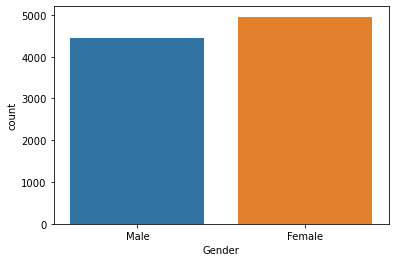

In [34]:
sns.countplot(data=df, x="Gender");

In [35]:
df['Gender'].value_counts()

Female    4957
Male      4447
Name: Gender, dtype: int64

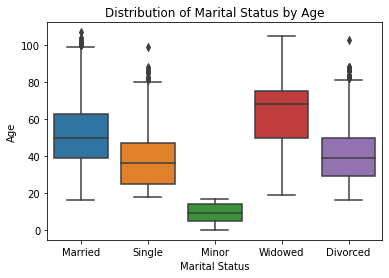

In [36]:
sns.boxplot(data=df, x='Marital Status', y='Age')
plt.xlabel("Marital Status")
plt.ylabel("Age")
plt.title("Distribution of Marital Status by Age");

In [37]:
df.loc[(df['Age'] < 20) & (df['Marital Status'] == "Married")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
227,35,Calendar Mill,Josephine,Hamilton,19,Wife,Married,Female,University Student,None,None
832,1,Mace Trafficway,Leah,Boyle,19,Head,Married,Female,"Therapist, nutritional",None,Christian
833,1,Mace Trafficway,Ronald,Boyle,19,Husband,Married,Male,University Student,None,Christian
910,13,Salmon Street,Conor,Powell,19,Husband,Married,Male,University Student,None,None
1041,30,Mace Green,Danielle,Gardner,19,Head,Married,Female,University Student,None,Methodist
1757,8,Brown Crescent,Terry,Mills,19,Head,Married,Male,University Student,None,None
1758,8,Brown Crescent,Gail,Mills,19,Wife,Married,Female,University Student,None,None
3895,99,Rhubarbshot Street,Emma,Blackburn,19,Wife,Married,Female,"Accountant, chartered",None,Methodist
4036,148,Rhubarbshot Street,Gemma,Booth,19,Wife,Married,Female,University Student,None,None
4157,31,Murray Avenue,Francesca,Martin,19,Wife,Married,Female,University Student,None,None


- There is a household of a 16 year old wife who is a student and a 19-year old husband who is a University Student.

In [38]:
df.loc[(df['Age'] < 20) & (df['Marital Status'] == "Widowed")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6852,32,Ball Lane,Declan,Nash,19,Son,Widowed,Male,University Student,None,None


- This is an outright lie. How can a 19-year old son to the house be widowed?
- The marital status of this subject will be replaced with Single.

In [39]:
#replacing the marital status of row 6852
df.at[6852, 'Marital Status']= "Single"

In [40]:
df.groupby('Marital Status')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,875.0,41.266286,16.382895,16.0,29.00,39.0,50.0,103.0
Married,2728.0,51.470308,16.731991,16.0,39.00,50.0,63.0,107.0
Minor,2233.0,9.165696,4.985044,0.0,5.00,9.0,14.0,17.0
Single,3210.0,37.438941,13.811541,18.0,25.00,36.0,47.0,99.0
Widowed,358.0,63.536313,17.859946,20.0,50.25,68.5,75.0,105.0


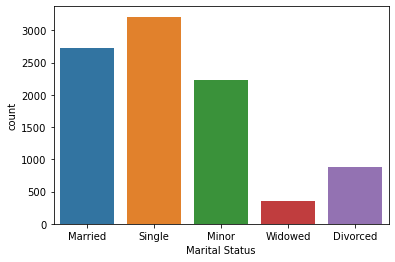

In [41]:
sns.countplot(data=df, x='Marital Status');

- There is a high probability to have more singles will get married in the future. Hence, the married people will increase and invariably will lead to more children.

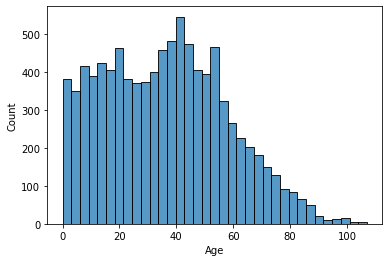

In [42]:
sns.histplot(data=df, x='Age');

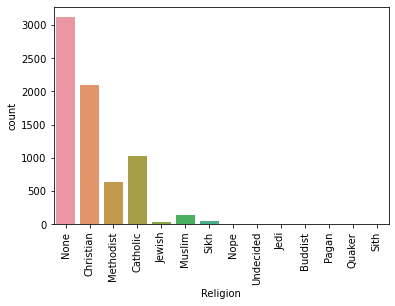

In [43]:
sns.countplot(data=df, x='Religion')
plt.xticks(rotation=90);

#### Religion distribution

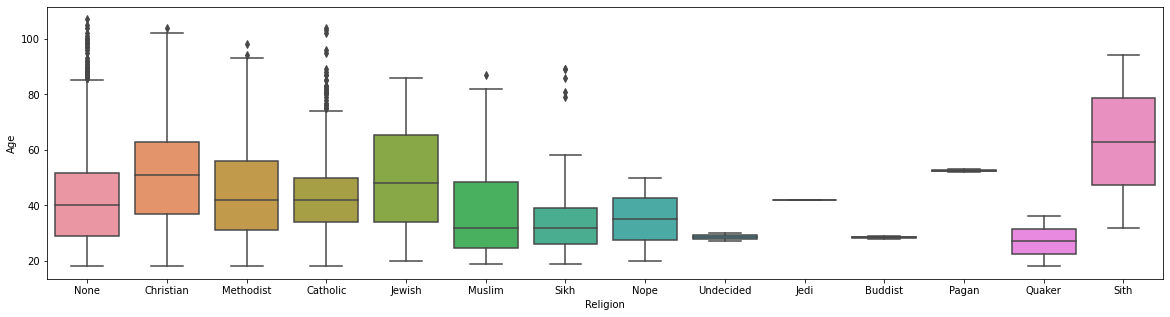

In [44]:
plt.figure(figsize=[20,5])
sns.boxplot(data=df, x='Religion', y='Age');

In [45]:
df.groupby('Religion')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Buddist,2.0,28.500000,0.707107,28.0,28.25,28.5,28.75,29.0
Catholic,1022.0,43.190802,14.881899,18.0,34.00,42.0,50.00,104.0
Christian,2101.0,50.110900,17.430312,18.0,37.00,51.0,63.00,104.0
Jedi,1.0,42.000000,NaN,42.0,42.00,42.0,42.00,42.0
Jewish,39.0,48.487179,18.681361,20.0,34.00,48.0,65.50,86.0
Methodist,638.0,44.468652,17.148116,18.0,31.00,42.0,56.00,98.0
Muslim,147.0,37.571429,16.422504,19.0,24.50,32.0,48.50,87.0
None,3118.0,42.026940,17.031305,18.0,29.00,40.0,51.75,107.0
Nope,2.0,35.000000,21.213203,20.0,27.50,35.0,42.50,50.0


##### Household occupancy

- Duplicate the dataframe
- Use the duplicate to carry out this data wrangling

In [46]:
df_h = df.copy()

- To determine household occupancy, combining the house number and the street will be important.

In [47]:
df_h['House Street'] = df_h['House Number'].astype(str) + "-" + df_h['Street']

In [48]:
df_h.head(2)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,House Street
0,1,Allen Circle,John,Grant,43,Head,Married,Male,Operational investment banker,None,None,1-Allen Circle
1,1,Allen Circle,Kim,Grant,37,Wife,Married,Female,Intelligence analyst,None,None,1-Allen Circle


In [49]:
#calculate the number of people in each household
 
Occupancy = df_h['House Street'].value_counts()

In [50]:
#assign the count of household to a dataframe df_h1
df_h1 = pd.DataFrame(Occupancy) 

In [51]:
df_h1 = df_h1.reset_index()

In [52]:
df_h1.columns = ['House Street', 'Occupancy level']

In [53]:
df_h1.head()

,House Street,Occupancy level
0,34-Powys Lane,20
1,43-Powys Lane,19
2,44-Connolly Park,17
3,3-Sutton Crescent,17
4,35-Connolly Park,16


In [54]:
df_h1['Occupancy level'].describe()

count    3329.000000
mean        2.824872
std         1.678564
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: Occupancy level, dtype: float64

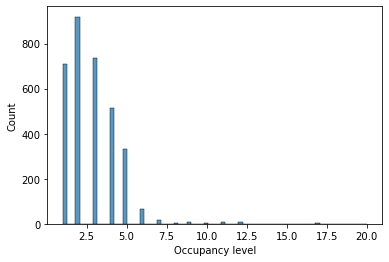

In [55]:
sns.histplot(data=df_h1, x='Occupancy level');

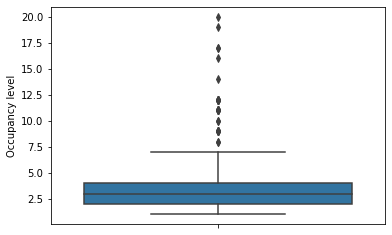

In [56]:
sns.boxplot(data=df_h1, y='Occupancy level');

In [57]:
df_h1 = pd.merge(df_h1, df_h, how='inner', on='House Street')

In [58]:
df_h1.head()

,House Street,Occupancy level,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,34-Powys Lane,20,34,Powys Lane,Jean,Davies,47,Head,Married,Female,"Doctor, hospital",None,None
1,34-Powys Lane,20,34,Powys Lane,Maurice,Davies,48,Husband,Married,Male,Armed forces operational officer,None,None
2,34-Powys Lane,20,34,Powys Lane,Toby,Gray,15,Son,Minor,Male,Student,None,NaN
3,34-Powys Lane,20,34,Powys Lane,Cameron,Gray,11,Son,Minor,Male,Student,None,NaN
4,34-Powys Lane,20,34,Powys Lane,Eleanor,Gray,8,Daughter,Minor,Female,Student,None,NaN


In [121]:
df_h1.groupby('Marital Status')['Occupancy level'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,875.0,3.716571,2.754175,1.0,2.0,3.0,5.0,20.0
Married,2728.0,3.326246,1.611706,2.0,2.0,3.0,4.0,20.0
Minor,2233.0,4.357815,2.281795,2.0,3.0,4.0,5.0,20.0
Single,3210.0,4.081620,2.774624,1.0,2.0,4.0,5.0,20.0
Widowed,358.0,2.187151,2.019832,1.0,1.0,1.0,3.0,17.0


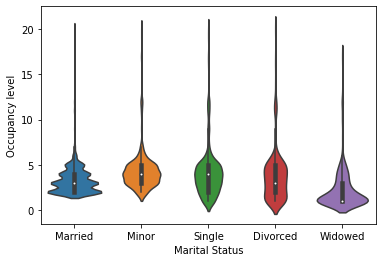

In [145]:
sns.violinplot(data=df_h1, x='Marital Status', y='Occupancy level')
plt.xlabel('Marital Status')
plt.ylabel('Occupancy level');

In [155]:
df_h1.groupby('Marital Status')['Age'].mean()

Marital Status
Divorced    41.266286
Married     51.470308
Minor        9.165696
Single      37.438941
Widowed     63.536313
Name: Age, dtype: float64

In [169]:
df_h1['Occupancy level'].value_counts()

3     2214
4     2052
2     1838
5     1660
1      709
6      396
12     120
7      105
11      99
9       72
17      34
10      20
20      20
19      19
8       16
16      16
14      14
Name: Occupancy level, dtype: int64

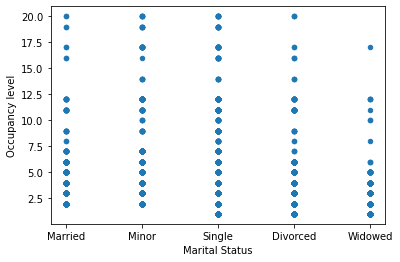

In [172]:
df_h1.plot.scatter(x='Marital Status', y='Occupancy level');

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9404 entries, 0 to 9404
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9404 non-null   int64 
 1   Street                         9404 non-null   object
 2   First Name                     9404 non-null   object
 3   Surname                        9404 non-null   object
 4   Age                            9404 non-null   int32 
 5   Relationship to Head of House  9404 non-null   object
 6   Marital Status                 9404 non-null   object
 7   Gender                         9404 non-null   object
 8   Occupation                     9404 non-null   object
 9   Infirmity                      9404 non-null   object
 10  Religion                       7131 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 1.1+ MB


##### Unemployment trend

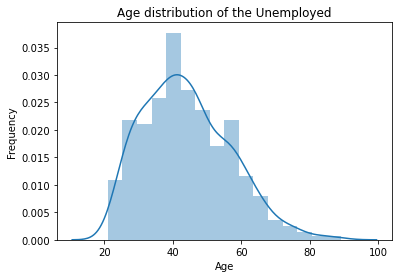

In [64]:
df_unemployed = df[df.Occupation == "Unemployed"]
sns.distplot(df_unemployed['Age'], label='Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution of the Unemployed');

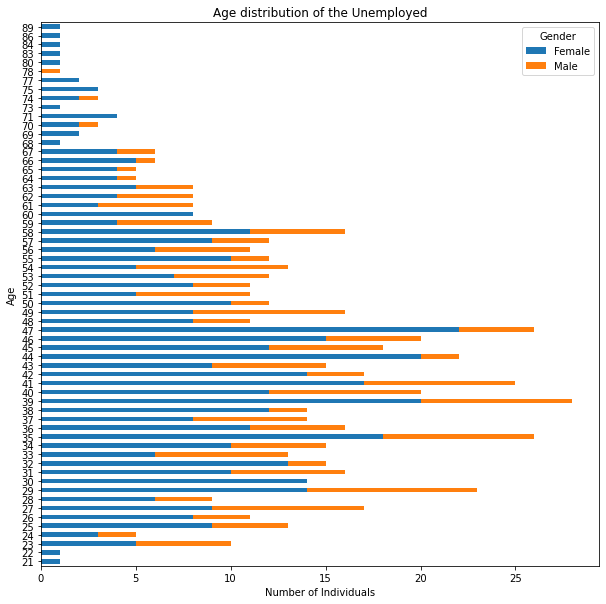

In [88]:
#bins = [0, 20, 40, 60, 80, 100]
#labels = [0, 20, 40, 60, 80]
#df_unemployed['age_bins'] = pd.cut(df_unemployed['Age'], bins= bins, labels=labels)

unemployed = df_unemployed.groupby(['Age','Gender']).size().reset_index(name='count')

# Pivot the table to create unemployed population pyramid
unemployed_p = unemployed.pivot_table(values='count', index='Age', columns='Gender')

# Plot the population pyramid
unemployed_p.plot(kind='barh', stacked=True, figsize=(10,10))
plt.xlabel('Number of Individuals')
plt.ylabel('Age')
plt.title('Age distribution of the Unemployed')
plt.show()

#### Population Pyramid

In [70]:
#create a duplicate dataframe for the population pyramid
df_p = df.copy()

In [72]:
#drop columns that are not needed for the population pyramid
df_p = df_p.drop(['House Number', 'Street', 'First Name', 'Surname', 'Relationship to Head of House', 'Occupation', 'Religion', 'Infirmity'], axis=1)

In [73]:
df_p.head(2)

,Age,Marital Status,Gender
0,43,Married,Male
1,37,Married,Female


In [74]:
df_p['Age'].describe()

count    9404.000000
mean       36.145364
std        21.490054
min         0.000000
25%        18.000000
50%        36.000000
75%        51.000000
max       107.000000
Name: Age, dtype: float64

In [89]:
bins = [0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99]
labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
df_p['Age group'] = pd.cut(df_p['Age'], bins=bins, labels=labels)

In [78]:
df_p.head(2)

,Age,Marital Status,Gender,Age group
0,43,Married,Male,40-44
1,37,Married,Female,35-39


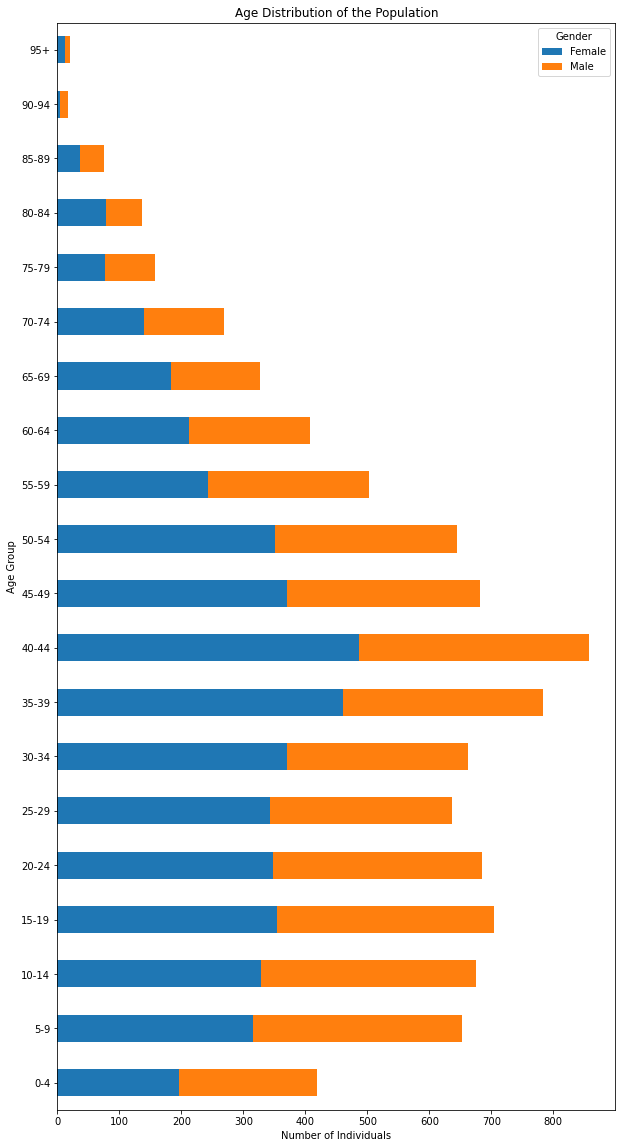

In [91]:
age_sex = df_p.groupby(['Age group', 'Gender']).size().reset_index(name='count')

# Pivot the table to create a population pyramid
pyramid = age_sex.pivot_table(values='count', index='Age group', columns='Gender')

# Plot the population pyramid
pyramid.plot(kind='barh', stacked=True, figsize=(10,20))
plt.xlabel('Number of Individuals')
plt.ylabel('Age Group')
plt.title('Age Distribution of the Population')
plt.show()

- To generate an age pyramid, the gender column has to be melted into two columns, the age and marital status columns must be removed.

In [102]:
#make a copy of the dataframe
df_age = df_p.copy()

In [103]:
#drop age and marital status columns
df_age = df_age.drop(['Marital Status'], axis=1)

In [104]:
df_age.head(2)

,Age,Gender,Age group
0,43,Male,40-44
1,37,Female,35-39


In [105]:
df_age.shape

(9404, 3)

In [106]:
# create two new columns 'Male' and 'Female' based on the 'Gender' column
df_new = pd.get_dummies(df_age['Gender'])

# concatenate the new columns with the original dataframe
df_age = pd.concat([df_age, df_new], axis=1)

# drop the original 'Gender' column
df_age.drop('Gender', axis=1, inplace=True)

In [107]:
df_age.head()

,Age,Age group,Female,Male
0,43,40-44,0,1
1,37,35-39,1,0
2,44,40-44,1,0
3,44,40-44,0,1
4,24,20-24,1,0


In [108]:
#remove age column
df_age = df_age.drop(['Age'], axis=1)

In [109]:
# use pd.pivot_table() to get the count of each age group for males and females
df_age = pd.pivot_table(df_age, values=['Male', 'Female'], index='Age group', aggfunc='sum')

In [110]:
df_age.head()

,Female,Male
Age group,,
0-4,196.0,223.0
5-9,316.0,336.0
10-14,328.0,347.0
15-19,355.0,349.0
20-24,347.0,338.0


In [111]:
df_age['Female_x'] = df_age['Female'] * -1

In [112]:
df_age.head(3)

,Female,Male,Female_x
Age group,,,
0-4,196.0,223.0,-196.0
5-9,316.0,336.0,-316.0
10-14,328.0,347.0,-328.0


In [114]:
df_age = df_age.reset_index()

In [115]:
df_age.columns = ['Age group', 'Female', 'Male', 'Female_x']

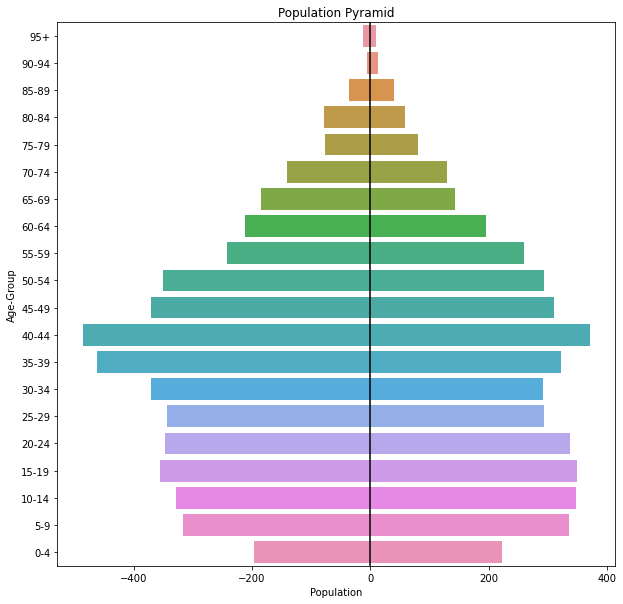

In [120]:
#generate a population pyramid using seaborn
Age_order = ['95+', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']
plt.figure(figsize=[10,10])
bar_plot = sns.barplot(x='Male', y='Age group', data=df_age, order=Age_order)

bar_plot = sns.barplot(x='Female_x', y='Age group', data=df_age, order=Age_order)

bar_plot.set(xlabel="Population", ylabel="Age-Group", title = "Population Pyramid")
plt.axvline(x=0, color='black');

##### Employment category

In [125]:
#create an employment status column
employment_status = []
for row in df['Occupation']:
    if row == 'Child':
        employment_status.append('Child')
    elif row == 'Student':
        employment_status.append('Student')
    elif row == 'University Student':
        employment_status.append('University Student')
    elif row == 'Retiree':
        employment_status.append('Retiree')
    elif row == 'Unemployed':
        employment_status.append('Unemployed')
    else:
        employment_status.append('Employed')
        

In [126]:
df['Employment Status'] = employment_status

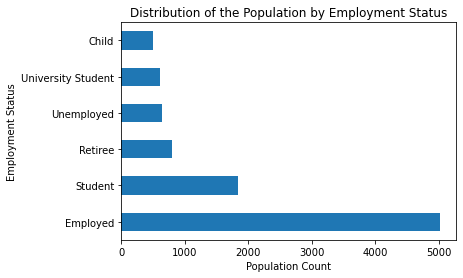

In [167]:
df['Employment Status'].value_counts().plot(kind='barh')
plt.ylabel('Employment Status')
plt.xlabel('Population Count')
plt.title('Distribution of the Population by Employment Status');

In [165]:
df['Employment Status'].value_counts(normalize=True)*100

Employed              53.339005
Student               19.587410
Retiree                8.421948
Unemployed             6.901319
University Student     6.507869
Child                  5.242450
Name: Employment Status, dtype: float64

In [124]:
df['Occupation'].unique()

array(['Operational investment banker', 'Intelligence analyst',
       'Production designer, theatre/television/film', 'Paediatric nurse',
       'Child psychotherapist', 'Student', 'Event organiser',
       'Surveyor, commercial/residential', 'Unemployed', 'Child',
       'Housing manager/officer', 'Advice worker',
       'International aid/development worker',
       'Senior tax professional/tax inspector',
       'Research scientist (medical)', 'Loss adjuster, chartered',
       'Patent examiner', 'Cytogeneticist', 'Education administrator',
       'University Student', 'Mechanical engineer', 'Wellsite geologist',
       'Exhibition designer', 'Civil Service fast streamer',
       'Accountant, chartered public finance', 'Restaurant manager',
       'Surveyor, building', 'Passenger transport manager',
       'Product designer', 'Graphic designer', 'Theatre manager',
       'Public relations officer', 'Youth worker',
       'Pension scheme manager', 'Recruitment consultant', 'Comptrol

##### Commuters

- Classify professions that can be done remotely as non-commuting jobs
- Students, child, unemployed, primary and secondary school teachers also considered non commuters
- University Students are commuters.

In [146]:
#designers, analysts, school teachers
non_commuters = ['designer', 'Acunpuncturist', 'developer', 'retail', 'secondary school', 'teacher', 'analyst', 'Retiree', 'Student', 'Child', 'Unemployed']
commuter_status = []
for row in df['Occupation']:
    if any(string in row for string in non_commuters):
        commuter_status.append('Non commuter')
    else:
        commuter_status.append('Commuter')

In [147]:
df['Commuter Status'] = commuter_status

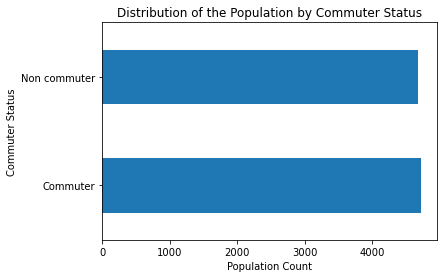

In [162]:
df['Commuter Status'].value_counts().plot(kind='barh')
plt.xlabel('Population Count')
plt.ylabel('Commuter Status')
plt.title('Distribution of the Population by Commuter Status');

In [150]:
df['Commuter Status'].value_counts(normalize=True)

Commuter        0.502233
Non commuter    0.497767
Name: Commuter Status, dtype: float64

- Roughly 50% of the population are commuters.

###### Infirmity

In [151]:
# Calculate count and frequency
#counts = df['Infirmity'].value_counts()
#freqs = counts / len(df) * 100

# Create table with count and frequency
#table = pd.concat([counts, freqs], axis=1)
#table.columns = ['Count', 'Frequency (%)']

# Create bar chart
#fig, ax = plt.subplots()
#ax.bar(table.index, table['Count'])
#ax.set_ylabel('Count')
#ax2 = ax.twinx()
#ax2.plot(table.index, table['Frequency (%)'], color='red', marker='o')
#ax2.set_ylabel('Frequency (%)')
#plt.title('Frequency of the Population by Infirmity')
#plt.show()

In [140]:
df['Infirmity'].value_counts()

None                   9341
Physical Disability      15
Mental Disability        10
Deaf                     10
                          9
Unknown Infection         8
Blind                     6
Disabled                  5
Name: Infirmity, dtype: int64

In [141]:
# replace blank values with NaN
df['Infirmity'].replace(' ', np.nan, inplace=True)

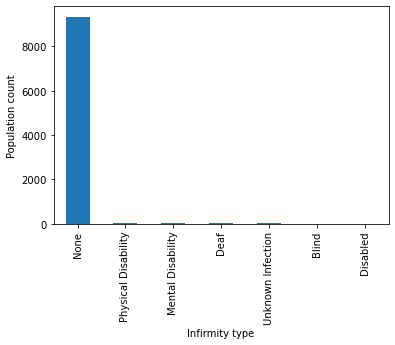

In [143]:
df['Infirmity'].value_counts().plot(kind='bar')
plt.xlabel('Infirmity type')
plt.ylabel('Population count');

In [166]:
df['Infirmity'].value_counts(normalize=True)

None                   0.994252
Physical Disability    0.001597
Mental Disability      0.001064
Deaf                   0.001064
Unknown Infection      0.000852
Blind                  0.000639
Disabled               0.000532
Name: Infirmity, dtype: float64

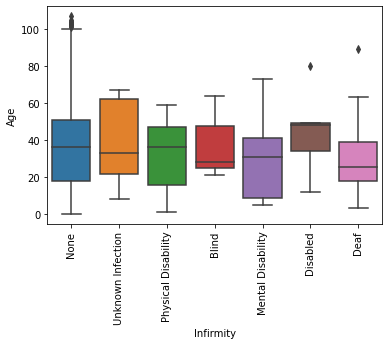

In [174]:
sns.boxplot(data=df, x='Infirmity', y='Age')
plt.xticks(rotation=90);